<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/Reconhecimento_facial_LBPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RECONHECIMENTO FACIAL

In [23]:
from PIL import Image
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import zipfile
path = '/content/drive/MyDrive/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [10]:
import os

In [11]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject',''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [12]:
ids, faces = dados_imagem()

In [13]:
print(ids)

[ 7  5  1 10  6  2  3  7  1  7 11  5 15 10  2 14  5  4  9  1  2  5  6 12
  3 15  1  5  3  2 15 13 10  7  3 10  7 12  1  7 12 13  5 14  9  6  5 15
  3 13  4 11 13  3  8  5 11  9  8  9  4  4 14  6 12 13 10  8 13  6  2 12
 13 15  8 15  8  4  6  2 13 15 10 11  7 14  1  3 11  6 11 10  9  1  8  7
  1  8  4  9  9 10 15  2 14  3 12  4  9  2  5  4 10 11 12 11  4 14  7 12
 15 13  8 14 12  2  6 11  3  1 14  6 14  8  9]


In [14]:
print(faces)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[117, 129, 130, ..., 255, 255, 255],
       [249, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,  93,  89,  90],
       [255, 255, 255, ..., 100,  96, 101],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [52]:
!pip uninstall opencv-python opencv-contrib-python opencv-python-headless -y
!pip install opencv-contrib-python

Found existing installation: opencv-contrib-python 4.13.0.90
Uninstalling opencv-contrib-python-4.13.0.90:
  Successfully uninstalled opencv-contrib-python-4.13.0.90
Found existing installation: opencv-python-headless 4.13.0.90
Uninstalling opencv-python-headless-4.13.0.90:
  Successfully uninstalled opencv-python-headless-4.13.0.90
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 MB 9.5 MB/s eta 0:00:00


In [15]:
import cv2

In [16]:
import cv2
try:
    lbph = cv2.face.LBPHFaceRecognizer_create()
    print("LBPH Recognizer created successfully!")
except AttributeError:
    print("Still not finding it. Check your installation.")

LBPH Recognizer created successfully!


In [17]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

## Classificação

In [18]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('classificadorLBPH.yml')


In [44]:
imagem_teste = '/content/yalefaces/test/subject03.glasses.gif'
imagem_teste

'/content/yalefaces/test/subject03.glasses.gif'

In [45]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [46]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

3

In [47]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject',''))
idcorreto

3

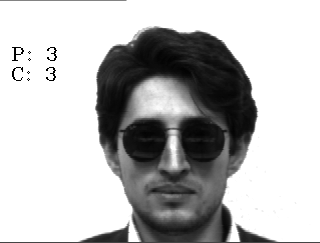

In [48]:
from google.colab.patches import cv2_imshow
x = 10
y = 30
cv2.putText(imagem_np,'P: ' + str(idprevisto),(x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np,'C: ' + str(idcorreto),(x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)